# Goodreads Book Reviews Analysis - Numerical Data Exploration

## Project Overview
This project aims to analyze **Goodreads book reviews**, focusing on **1-star ratings** to understand patterns in harsh reviews. The analysis is divided into two parts:
1. **Numerical Data Analysis** (Current Stage) - Examining numerical factors such as star ratings, review counts, and genre distributions.
2. **Natural Language Processing (NLP) Analysis** (Next Stage) - Exploring book descriptions and text reviews to identify sentiment patterns.

## Phase 1: Numerical Data Cleaning and Transformation

### 1. Data Import and Initial Inspection
- The dataset was imported using Pandas and inspected for missing values, incorrect formats, and inconsistencies.
- Key columns:
  - **Star Ratings** (`star_rating`)
  - **Number of Ratings** (`num_ratings`)
  - **Number of Reviews** (`num_reviews`)
  - **Genres** (`genres`)
  - **Community Reviews** (extracted into separate rating percentages)


In [1]:
pip install jupyter pandas numpy matplotlib seaborn scikit-learn nltk

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     -------------------------------------- 104.6/104.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.6 MB 13.2 MB/s eta 0:00:01
   --- ------------------------------------ 1.1/11.6 MB 13.9 MB/s eta 0:00:01
   ------- ----------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mjack245\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mjack245\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

df = pd.read_csv("./Data/Goodreads-Books.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df.head()

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price
0,https://www.goodreads.com/book/show/1047836.Ho...,1047836.Horror_Film_Directors_1931_1990,"Horror Film Directors, 1931-1990","[""Dennis Fischer""]",4.29,7.0,NaN,An exhaustive study of the major directors of ...,NaN,11/1/1991,"{""name"":""Dennis Fischer"",""num_books"":14}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
1,https://www.goodreads.com/book/show/4089333-au...,4089333-australian-urban-planning,"Australian Urban Planning: New Challenges, New...","[""Brendan Gleeson""]",3.00,1.0,NaN,"Designed for use by academics, students, plann...",NaN,2/1/2000,"{""name"":""Brendan Gleeson"",""num_books"":28}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
2,https://www.goodreads.com/book/show/26764878-m...,26764878-morgen-ohne-gestern,Morgen ohne gestern: Roman,"[""Regina Nössler""]",3.00,2.0,NaN,Christine Hoffmann wacht eines Morgens im Kran...,NaN,9/18/2015,"{""name"":""Regina Nössler"",""num_books"":28,""num_f...","{""1_stars"":{""reviews_num"":1,""reviews_percentag...","""$10.89"""
3,https://www.goodreads.com/book/show/23656944-z...,23656944-zen-and-the-art-of-recording,Zen and the Art of Recording,"[""Mixerman""]",4.19,88.0,4.0,"In this book, the third in the Zen and the Art...","[""Music"",""Nonfiction""]",10/1/2014,"{""name"":""Mixerman"",""num_books"":15,""num_followe...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$24.09"""
4,https://www.goodreads.com/book/show/26761586-t...,26761586-the-big-book-of-codewords,The Big Book Of Codewords,"[""Parragon Books""]",4.50,6.0,NaN,500 codeword puzzles in one great book!,NaN,9/5/2015,"{""name"":""Parragon Books"",""num_books"":6068,""num...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN


In [ ]:
df.sample(20)

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price
1700547,https://www.goodreads.com/book/show/25012393-t...,25012393-the-ic,The IC,"[""Sandy Ingram""]",1.00,1.0,NaN,"Every country has them, no country admits to u...",NaN,5/25/2014,"{""name"":""Sandy Ingram"",""num_books"":20,""num_fol...","{""1_stars"":{""reviews_num"":1,""reviews_percentag...",NaN
3807962,https://www.goodreads.com/book/show/31413570-t...,31413570-the-hand-of-fate-8,The Hand of Fate #8,"[""Ace Comics""]",4.50,2.0,NaN,Classic Horror-Suspense ComicsTHE HAND OF FATE...,NaN,8/2/2016,"{""name"":""Ace Comics"",""num_books"":401}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
4004146,https://www.goodreads.com/book/show/13530075-u...,13530075-unexpected-daddy,Unexpected Daddy,"[""Brenna Lyons""]",3.18,281.0,41.0,"After a car accident destroys his family, Joey...","[""M M Romance"",""Romance"",""Contemporary"",""Short...",3/16/2012,"{""name"":""Brenna Lyons"",""num_books"":126,""num_fo...","{""1_stars"":{""reviews_num"":9,""reviews_percentag...","""$0.99"""
6180592,https://www.goodreads.com/book/show/1218461.Th...,1218461.The_Poisoned_Weed,The Poisoned Weed: Plants Toxic to Skin,"[""Donald G. Crosby""]",0.00,0.0,NaN,Over-two thirds of the U.S. population is alle...,NaN,1/1/2004,"{""name"":""Donald G. Crosby"",""num_books"":9,""num_...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$76.95"""
4798974,https://www.goodreads.com/book/show/31450324-t...,31450324-the-wolf-the-seven-kids,The Wolf & The Seven Kids,"[""Pegasus Team""]",4.00,2.0,NaN,Stories have always appealed to children for t...,NaN,4/1/2011,"{""name"":""Pegasus Team"",""num_books"":189}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$1.05"""
4801316,https://www.goodreads.com/book/show/1523748.Mo...,1523748.Modern_Mezze,Modern Mezze,"[""Anissa Helou""]",4.13,8.0,NaN,"Mezze, a leisurely feast comprising a selectio...","[""Food"",""Cooking"",""Cookbooks""]",7/6/2007,"{""name"":""Anissa Helou"",""num_books"":19,""num_fol...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
1610919,https://www.goodreads.com/book/show/26513894-s...,26513894-should-i-stay-or-go,Should I Stay or Go?: How Controlled Separatio...,"[""Lee Raffel""]",3.00,1.0,NaN,"Until now, couples facing the dilemma of decid...",NaN,9/22/1999,"{""name"":""Lee Raffel"",""num_books"":4,""num_follow...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
5204909,https://www.goodreads.com/book/show/3148926-8-...,3148926-8-seconds,8 Seconds: The Cowboy Guide to Riding the Chri...,"[""Kevin Landis""]",0.00,0.0,NaN,8 A Cowboy Guide to Riding the Christian Life...,NaN,10/30/2007,"{""name"":""Kevin Landis"",""num_books"":6,""num_foll...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
999374,https://www.goodreads.com/book/show/29340187-2...,29340187-20-story-interracial-mega-bundle,20 Story Interracial Mega Bundle,"[""Esme Fade""]",3.00,3.0,NaN,Included in this TWENTY STORY INTERRACIAL EROT...,NaN,2/24/2016,"{""name"":""Esme Fade"",""num_books"":134,""num_follo...","{""1_stars"":{""reviews_num"":1,""reviews_percentag...",NaN
4843213,https://www.goodreads.com/book/show/20292899-a...,20292899-american-girl-dolls---kirsten-larson,American Girl Dolls - Kirsten Larson: American...,"[""Source Wikia""]",3.67,3.0,NaN,This book consists of articles from Wikia or o...,NaN,9/12/2013,"{""name"":""Source Wikia"",""num_books"":14531,""num_...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN


In [ ]:
import ast # Convert JSON-like strings in 'community_reviews' to dictionary format
df['community_reviews'] = df['community_reviews'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract 1-star reviews count and percentage
df['1_star_reviews_num'] = df['community_reviews'].apply(lambda x: x['1_stars']['reviews_num'] if isinstance(x, dict) else 0)
df['1_star_reviews_percentage'] = df['community_reviews'].apply(lambda x: x['1_stars']['reviews_percentage'] if isinstance(x, dict) else 0)

# Convert genres from string to list
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Explode so each genre is a separate row
df_exploded = df.explode('genres')

KeyboardInterrupt: 

In [ ]:
df_exploded.head(30)

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price,1_star_reviews_num,1_star_reviews_percentage
0,https://www.goodreads.com/book/show/1047836.Ho...,1047836.Horror_Film_Directors_1931_1990,"Horror Film Directors, 1931-1990","[""Dennis Fischer""]",4.29,7.0,NaN,An exhaustive study of the major directors of ...,NaN,11/1/1991,"{""name"":""Dennis Fischer"",""num_books"":14}","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0
1,https://www.goodreads.com/book/show/4089333-au...,4089333-australian-urban-planning,"Australian Urban Planning: New Challenges, New...","[""Brendan Gleeson""]",3.00,1.0,NaN,"Designed for use by academics, students, plann...",NaN,2/1/2000,"{""name"":""Brendan Gleeson"",""num_books"":28}","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0
2,https://www.goodreads.com/book/show/26764878-m...,26764878-morgen-ohne-gestern,Morgen ohne gestern: Roman,"[""Regina Nössler""]",3.00,2.0,NaN,Christine Hoffmann wacht eines Morgens im Kran...,NaN,9/18/2015,"{""name"":""Regina Nössler"",""num_books"":28,""num_f...","{'1_stars': {'reviews_num': 1, 'reviews_percen...","""$10.89""",1,50
3,https://www.goodreads.com/book/show/23656944-z...,23656944-zen-and-the-art-of-recording,Zen and the Art of Recording,"[""Mixerman""]",4.19,88.0,4.0,"In this book, the third in the Zen and the Art...",Music,10/1/2014,"{""name"":""Mixerman"",""num_books"":15,""num_followe...","{'1_stars': {'reviews_num': 0, 'reviews_percen...","""$24.09""",0,0
3,https://www.goodreads.com/book/show/23656944-z...,23656944-zen-and-the-art-of-recording,Zen and the Art of Recording,"[""Mixerman""]",4.19,88.0,4.0,"In this book, the third in the Zen and the Art...",Nonfiction,10/1/2014,"{""name"":""Mixerman"",""num_books"":15,""num_followe...","{'1_stars': {'reviews_num': 0, 'reviews_percen...","""$24.09""",0,0
4,https://www.goodreads.com/book/show/26761586-t...,26761586-the-big-book-of-codewords,The Big Book Of Codewords,"[""Parragon Books""]",4.50,6.0,NaN,500 codeword puzzles in one great book!,NaN,9/5/2015,"{""name"":""Parragon Books"",""num_books"":6068,""num...","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0
5,https://www.goodreads.com/book/show/32471492-a...,32471492-antique-apples-from-kilcherman-s-chri...,Antique Apples from Kilcherman's Christmas Cov...,"[""Phyllis Bye Kilcherman""]",4.00,1.0,NaN,Antique Apples from Kilcherman’s Christmas Cov...,NaN,9/1/2016,"{""name"":""Phyllis Bye Kilcherman"",""num_books"":1}","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0
6,https://www.goodreads.com/book/show/32476267-i...,32476267-it-s-a-wonderful-death,It's A Wonderful Death: A Fortannis Novel,"[""Derek Beebe""]",4.38,8.0,4.0,A brave knight breaks her vows to fight agains...,NaN,9/26/2016,"{""name"":""Derek Beebe"",""num_books"":7,""num_follo...","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0
7,https://www.goodreads.com/book/show/4201989-an...,4201989-an-introduction-to-clay-colloid-chemistry,An Introduction to Clay Colloid Chemistry,"[""H. Van Olphen""]",4.50,2.0,NaN,NaN,NaN,5/12/1977,"{""name"":""H. Van Olphen"",""num_books"":10}","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0
8,https://www.goodreads.com/book/show/4103828-om...,4103828-oman-under-qaboos,Oman Under Qaboos,"[""Calvin H. Allen""]",3.56,9.0,NaN,"This is an examination of the political, econo...",History,3/30/2000,"{""name"":""Calvin H. Allen"",""num_books"":4}","{'1_stars': {'reviews_num': 0, 'reviews_percen...","""$78.84""",0,0


In [ ]:
#extract 5 star reviews
df_exploded['5_star_reviews_num'] = df['community_reviews'].apply(
    lambda x: x['5_stars']['reviews_num'] if isinstance(x, dict) else 0)
df_exploded['5_star_reviews_percentage'] = df['community_reviews'].apply(
    lambda x: x['5_stars']['reviews_percentage'] if isinstance(x, dict) else 0)

In [ ]:
df_exploded.info()

NameError: name 'df_exploded' is not defined

In [ ]:
import numpy as np

In [ ]:
df_exploded['first_published'] = pd.to_datetime(df_exploded['first_published'], errors='coerce')
df_exploded['year_published'] = df_exploded['first_published'].dt.year  # Extract year only

In [ ]:
df_exploded.sample(30)

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price,1_star_reviews_num,1_star_reviews_percentage,5_star_reviews_num,5_star_reviews_percentage,year_published
1064730,https://www.goodreads.com/book/show/13606277-c...,13606277-crazy-for-cowboy,Crazy for Cowboy,"[""Roxy Boroughs""]",3.37,494.0,53.0,She’s through with cowboys. But this one’s the...,Romance,2012-04-14,"{""name"":""Roxy Boroughs"",""num_books"":22,""num_fo...","{'1_stars': {'reviews_num': 32, 'reviews_perce...","""$2.99""",32,6,90,18,2012.0
6358746,https://www.goodreads.com/book/show/173324.Saf...,173324.Safe_in_the_Shepherd_s_Arms,Safe in the Shepherd's Arms,"[""Max Lucado""]",4.40,686.0,68.0,In today's world it can be difficult to feel s...,Christian,2000-02-29,"{""name"":""Max Lucado"",""num_books"":1063,""num_fol...","{'1_stars': {'reviews_num': 7, 'reviews_percen...","""$11.99""",7,1,404,58,2000.0
4267350,https://www.goodreads.com/book/show/40122027-t...,40122027-the-railwayman-s-pocketbook,The Railwayman's Pocketbook,"[""R.H.N. Hardy""]",4.67,3.0,1.0,This fascinating pocket book draws on numerous...,Railways,2019-03-19,"{""name"":""R.H.N. Hardy"",""num_books"":5}","{'1_stars': {'reviews_num': 0, 'reviews_percen...","""$9.99""",0,0,2,66,2019.0
1511457,https://www.goodreads.com/book/show/806495.Lea...,806495.Lead_Us_Not_into_Temptation,Lead Us Not into Temptation: Catholic Priests ...,"[""Jason Berry""]",3.91,58.0,11.0,This updated edition of an unusually important...,Religion,1992-09-01,"{""name"":""Jason Berry"",""num_books"":36,""num_foll...","{'1_stars': {'reviews_num': 0, 'reviews_percen...","""$9.99""",0,0,19,32,1992.0
3317525,https://www.goodreads.com/book/show/8106089-th...,8106089-the-39-clues,The 39 Clues: Agent Handbook,"[""Scholastic Inc.""]",4.14,8669.0,27.0,The Cahills are the most powerful family in th...,Juvenile,2010-04-01,"{""name"":""Scholastic Inc."",""num_books"":3062,""nu...","{'1_stars': {'reviews_num': 293, 'reviews_perc...",NaN,293,3,4719,54,2010.0
383411,https://www.goodreads.com/book/show/6361921,6361921,Έγκλημα στη Μύκονο,"[""Yannis Maris""]",3.54,140.0,13.0,"Mykonos, metà degli anni Cinquanta. Nella cosm...",Crime,1958-01-01,"{""name"":""Yannis Maris"",""num_books"":82,""num_fol...","{'1_stars': {'reviews_num': 2, 'reviews_percen...",NaN,2,1,19,13,1958.0
919148,https://www.goodreads.com/book/show/13065336-c...,18142691-champagne,Champagne,"[""Anton Chekhov""]",3.38,133.0,15.0,A despondent young man without connections is ...,Short Stories,2013-07-16,"{""name"":""Anton Chekhov"",""num_books"":5095,""num_...","{'1_stars': {'reviews_num': 2, 'reviews_percen...","""$0.99""",2,1,18,13,2013.0
4160624,https://www.goodreads.com/book/show/5383003-j-...,5383003-j-w-waterhouse,J.W. Waterhouse: The Modern Pre-Raphaelite,"[""Elizabeth Prettejohn""]",4.49,37.0,2.0,With his grand scale and richly colored canvas...,Art History,2008-01-01,"{""name"":""Elizabeth Prettejohn"",""num_books"":21,...","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0,19,51,2008.0
6356284,https://www.goodreads.com/book/show/1735603.No...,1735603.No_Pasaran_Vol_1,No Pasaran! Vol. 1,"[""Vittorio Giardino""]",3.92,118.0,12.0,A suspenseful tale set in the Spanish Civil Wa...,Graphic Novels Comics,2000-01-01,"{""name"":""Vittorio Giardino"",""num_books"":80,""nu...","{'1_stars': {'reviews_num': 1, 'reviews_percen...","""$8.99""",1,0,36,30,2000.0
231919,https://www.goodreads.com/book/show/824578.The...,824578.The_Cabbage_Soup_Solution,The Cabbage Soup Solution,"[""Erika Oller""]",3.59,54.0,9.0,After noticing that many of her cabbages were ...,Childrens,2004-01-26,"{""name"":""Erika Oller"",""num_books"":13,""num_foll...","{'1_stars': {'reviews_num': 0, 'reviews_percen...",NaN,0,0,11,20,2004.0


In [ ]:
df_exploded['num_reviews'] = df_exploded['num_reviews'].fillna(0).astype(int)
df_exploded['num_ratings'] = df_exploded['num_ratings'].fillna(0).astype(int)

In [ ]:
#exploding community review column
df_exploded['2_star_reviews_num'] = df_exploded['community_reviews'].apply(
    lambda x: x['2_stars']['reviews_num'] if isinstance(x, dict) and '2_stars' in x else 0)
df_exploded['2_star_reviews_percentage'] = df_exploded['community_reviews'].apply(
    lambda x: x['2_stars']['reviews_percentage'] if isinstance(x, dict) and '2_stars' in x else 0)

df_exploded['3_star_reviews_num'] = df_exploded['community_reviews'].apply(
    lambda x: x['3_stars']['reviews_num'] if isinstance(x, dict) and '3_stars' in x else 0)
df_exploded['3_star_reviews_percentage'] = df_exploded['community_reviews'].apply(
    lambda x: x['3_stars']['reviews_percentage'] if isinstance(x, dict) and '3_stars' in x else 0)

df_exploded['4_star_reviews_num'] = df_exploded['community_reviews'].apply(
    lambda x: x['4_stars']['reviews_num'] if isinstance(x, dict) and '4_stars' in x else 0)
df_exploded['4_star_reviews_percentage'] = df_exploded['community_reviews'].apply(
    lambda x: x['4_stars']['reviews_percentage'] if isinstance(x, dict) and '4_stars' in x else 0)

In [ ]:
# Drop columns
df_exploded = df_exploded.drop(columns=['community_reviews'])

df_exploded = df_exploded.drop(columns=['url'])

df_exploded = df_exploded.drop(columns=['id'])

df_exploded = df_exploded.drop(columns=['first_published'])

In [ ]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10719469 entries, 0 to 6389858
Data columns (total 20 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   author                     object 
 2   star_rating                float64
 3   num_ratings                int64  
 4   num_reviews                int64  
 5   summary                    object 
 6   genres                     object 
 7   about_author               object 
 8   kindle_price               object 
 9   1_star_reviews_num         int64  
 10  1_star_reviews_percentage  int64  
 11  5_star_reviews_num         int64  
 12  5_star_reviews_percentage  int64  
 13  year_published             float64
 14  2_star_reviews_num         int64  
 15  2_star_reviews_percentage  int64  
 16  3_star_reviews_num         int64  
 17  3_star_reviews_percentage  int64  
 18  4_star_reviews_num         int64  
 19  4_star_reviews_percentage  int64  
dtypes: flo

In [ ]:
df_exploded.sample(30)

,name,author,star_rating,num_ratings,num_reviews,summary,genres,about_author,kindle_price,1_star_reviews_num,1_star_reviews_percentage,5_star_reviews_num,5_star_reviews_percentage,year_published,2_star_reviews_num,2_star_reviews_percentage,3_star_reviews_num,3_star_reviews_percentage,4_star_reviews_num,4_star_reviews_percentage
5144596,Veterans Stadium: Field Of Memories,"[""Darren Daulton""]",3.25,4,1,"In its thirty three years, Veterans Stadium wa...",NaN,"{""name"":""Darren Daulton"",""num_books"":2,""num_fo...",NaN,0,0,1,25,2005.0,2,50,0,0,1,25
3675177,Tokyo Longing: A Host Club Romance,"[""Marina Lovechild""]",3.40,10,7,A Woman Hunting For Passion\r\nAmerican girl A...,Romance,"{""name"":""Marina Lovechild"",""num_books"":2,""num_...","""$0.99""",2,20,2,20,2013.0,1,10,0,0,5,50
4642640,"Somewhere, Nowhere","[""Lindsay Price""]",0.00,0,0,"Somewhere, NowhereBy Lindsay PriceA small town...",NaN,"{""name"":""Lindsay Price"",""num_books"":102,""num_f...","""$9.95""",0,0,0,0,2013.0,0,0,0,0,0,0
294775,Dexter,"[""Erica Chilson""]",4.29,290,42,"Master of Restraint and sadist, Dexter Hayes h...",Menage,"{""name"":""Erica Chilson"",""num_books"":42,""num_fo...","""$3.99""",2,0,145,50,2012.0,3,1,50,17,90,31
4616117,Ambush Marketing Attack! 10 Easy and Inexpensi...,"[""Ori Ben-Shalom""]",0.00,0,0,This day and age it is very hard to have your ...,NaN,"{""name"":""Ori Ben-Shalom"",""num_books"":1}","""$2.99""",0,0,0,0,2012.0,0,0,0,0,0,0
5229120,Outside the Dog Museum,"[""Jonathan Carroll""]",3.96,1726,122,Harry Radcliffe is a brilliant prize-winning a...,Novels,"{""name"":""Jonathan Carroll"",""num_books"":115,""nu...","""$7.99""",17,0,546,31,1991.0,86,4,400,23,677,39
256768,Full Facial Care,"[""Nixie Goldslip""]",4.00,2,1,Gail the receptionist has her eye on the young...,NaN,"{""name"":""Nixie Goldslip"",""num_books"":49}","""$2.99""",0,0,1,50,2015.0,0,0,1,50,0,0
4279233,Jane Eyre,"[""Mary Sebag-Montefiore""]",4.00,38,5,This is a dramatic adaptation of the much-love...,Classics,"{""name"":""Mary Sebag-Montefiore"",""num_books"":36...",NaN,1,2,13,34,2012.0,1,2,8,21,15,39
598722,Μαρξισμός και αναρχισμός,"[""Murray Bookchin""]",4.00,3,0,Ποια είναι η θέση του Murray Bookchin απέναντι...,NaN,"{""name"":""Murray Bookchin"",""num_books"":128,""num...",NaN,0,0,0,0,2010.0,0,0,0,0,3,100
5328536,Loumyx Tome 1,"[""Francesca Santi""]",3.20,5,0,NaN,NaN,"{""name"":""Francesca Santi"",""num_books"":11,""num_...",NaN,0,0,0,0,2010.0,1,20,2,40,2,40


In [ ]:
#cleaning author column just in case I want to use it later
df_exploded['author'] = df_exploded['author'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '').replace("'", "").strip())

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
# Remove rows where star_rating, num_ratings, and num_reviews are 0 and genres is NaN
df_exploded = df_exploded[~((df_exploded['star_rating'] == 0) & 
          (df_exploded['num_ratings'] == 0) & 
          (df_exploded['num_reviews'] == 0) & 
          (df_exploded['genres'].isna()))]

In [ ]:
df_exploded['genres'].nunique()

1246

In [ ]:
mask = (
    (df_exploded['star_rating'].fillna(0) == 0) &
    (df_exploded['num_ratings'].fillna(0) == 0) &
    (df_exploded['num_reviews'].fillna(0) == 0) &
    (
        df_exploded['genres'].isna() | 
        (df_exploded['genres'].str.lower() == 'nan') | 
        (df_exploded['genres'].str.strip() == '') ))

In [ ]:
df_masked = df_exploded[mask]
print(df_masked)

                                                      name           author  \
11                                             塔木德大全集(珍藏版)              柯友辉   
16       Ok Cupid Dating Success: Attract & Seduce Girl...    Seventy Seven   
21       Workforce Housing: Innovative Strategies and B...  Richard Haughey   
27                                              Cosmopolis      PAUL BORGET   
33       The Koran, in 3 Hours: An Abridged, Unbiased A...     James   Dean   
...                                                    ...              ...   
6389827            Conversação libertária com Paulo Freire   Edson Passetti   
6389828                              70 Great Android Tips     Gaurav Dhaka   
6389832               The Tales of Adarya: Out of the Past  Alaina Buchwald   
6389843  The American Dream Gone Astray: Critical Reali...      Jürg Keller   
6389844      Storytelling: Selected Annotated Bibliography           Greene   

         star_rating  num_ratings  num_reviews  \
1

In [ ]:
# View unique values in specific columns
unique_genres = df_masked['genres'].unique()
unique_star_rating = df_masked['star_rating'].unique()
unique_num_ratings = df_masked['num_ratings'].unique()
unique_num_reviews = df_masked['num_reviews'].unique()

print("Unique values in genres:", unique_genres)
print("Unique values in star_rating:", unique_star_rating)
print("Unique values in num_ratings:", unique_num_ratings)
print("Unique values in num_reviews:", unique_num_reviews)

Unique values in genres: ['nan']
Unique values in star_rating: [ 0. nan]
Unique values in num_ratings: [0]
Unique values in num_reviews: [0]


In [ ]:
df_exploded = df_exploded[~mask]

In [ ]:
#before
print("before shape:", df.shape)

#after
print("after shape:", df_exploded.shape)

before shape: (6389859, 21)
after shape: (10069926, 20)


In [ ]:
df_exploded = df_exploded.drop(columns=['kindle_price'])

In [ ]:
df_exploded.sample(30)

,name,author,star_rating,num_ratings,num_reviews,summary,genres,about_author,1_star_reviews_num,1_star_reviews_percentage,5_star_reviews_num,5_star_reviews_percentage,year_published,2_star_reviews_num,2_star_reviews_percentage,3_star_reviews_num,3_star_reviews_percentage,4_star_reviews_num,4_star_reviews_percentage
2612288,Mortelle mémoire,Jean-Paul Nozière,1.67,9,2,Ariane vient de se faire embaucher pour l'été....,nan,"{""name"":""Jean-Paul Nozière"",""num_books"":85}",5,55,0,0,2009.0,2,22,2,22,0,0
3004579,Zorba the Hutt's Revenge,Paul Davids,2.77,705,37,When Zorba the Hutt discovers that his son Jab...,Novels,"{""name"":""Paul Davids"",""num_books"":17,""num_fol...",123,17,90,12,1992.0,181,25,229,32,82,11
1033179,Asset Management Handbook for Real Estate Port...,R.M. Santucci,1.00,1,0,The Asset Management Handbook is divided into ...,nan,"{""name"":""R.M. Santucci"",""num_books"":3}",1,100,0,0,2013.0,0,0,0,0,0,0
2986097,Shadow of a Dark Queen,Raymond E. Feist,4.08,30106,360,"Feist, author of the Riftwar Saga, embarks on ...",Audiobook,"{""name"":""Raymond E. Feist"",""num_books"":355,""nu...",165,0,10838,35,1994.0,913,3,6150,20,12040,39
1557675,Acropolis Restored,Charalampos Bouras,5.00,1,0,The individual contributors to these papers te...,nan,"{""name"":""Charalampos Bouras"",""num_books"":3}",0,0,1,100,2011.0,0,0,0,0,0,0
2880413,"Schrijfhulp: training van structuur, stijl en ...",Lia Hesemans,3.00,1,0,"Structureren, formuleren, publiek- en doelgeri...",nan,"{""name"":""Lia Hesemans"",""num_books"":2}",0,0,0,0,2009.0,0,0,1,100,0,0
6236926,The Shared Heart: Portraits And Stories Celebr...,Adam Mastoon,4.14,36,5,"With candor and sensitivity, thirty-nine young...",LGBT,"{""name"":""Adam Mastoon"",""num_books"":4}",0,0,16,44,1997.0,0,0,11,30,9,25
5819578,"15 Stars: Eisenhower, MacArthur, Marshall: Thr...",Stanley Weintraub,3.79,110,17,Documents the historical contributions of and ...,Leadership,"{""name"":""Stanley Weintraub"",""num_books"":123,""n...",1,0,26,23,2007.0,8,7,30,27,45,40
4157635,"Mafia Billionaire's Baby: Night in Shadow, Part 1",Melanie Ray,4.00,4,0,"From their first meeting, Sierra felt a danger...",nan,"{""name"":""Melanie Ray"",""num_books"":39,""num_foll...",0,0,2,50,2015.0,0,0,2,50,0,0
4035855,Jim Butcher's The Dresden Files: Welcome to th...,Jim Butcher,4.20,814,25,The very first issue of the first series of co...,Paranormal,"{""name"":""Jim Butcher"",""num_books"":267,""num_fol...",9,1,369,45,2008.0,18,2,142,17,276,33


In [ ]:
print(df_exploded['star_rating'].value_counts())

star_rating
4.00    808230
5.00    565394
3.00    449819
3.50    258176
4.50    233185
         ...  
1.04         1
1.10         1
1.15         1
1.09         1
1.05         1
Name: count, Length: 396, dtype: int64


In [ ]:
df_exploded.to_csv("cleaned_numerical_data_only.csv", index=True)

## Phase 2: Numerical Data Exploration and Visualization

### 1. **Top 20 Most Common Genres**
**Objective**: Identify the most frequent book genres.

In [ ]:
# visualizations

import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/2z/wrbf0xfj7dx7p5r_t84w_f8w0000gn/T/ipykernel_61879/4056581698.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


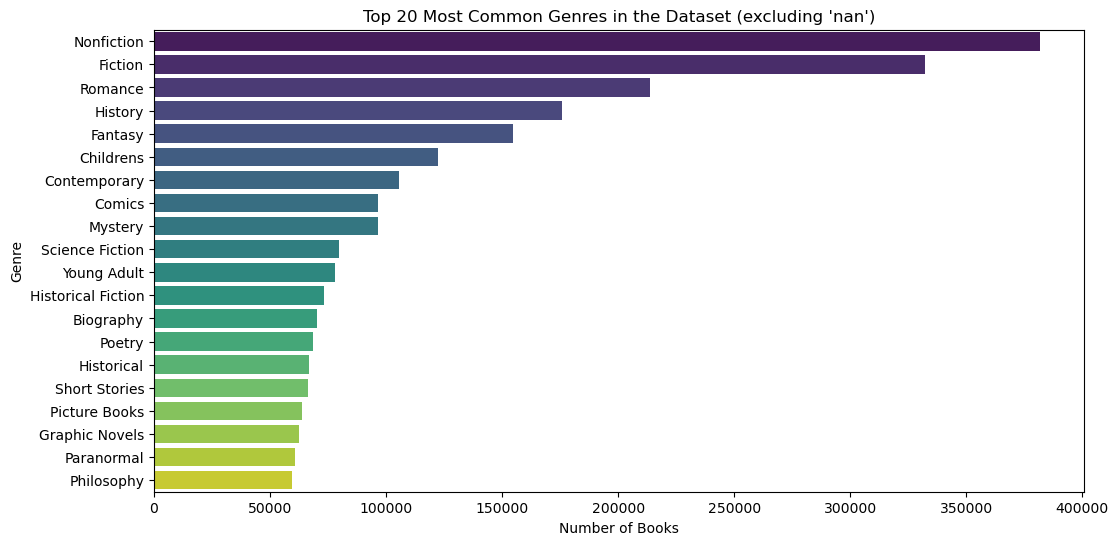

In [ ]:
# Exclude rows where 'genres' is 'nan'
filtered_genres = df_exploded.loc[df_exploded['genres'].str.lower() != 'nan', 'genres']

# Now get the top 20 genres
genre_counts = filtered_genres.value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.xlabel("Number of Books")
plt.ylabel("Genre")
plt.title("Top 20 Most Common Genres in the Dataset (excluding 'nan')")
plt.show()

### 2. **Genres with the Highest Percentage of 1-Star Reviews**
**Objective**: Identify which genres tend to receive the most negative ratings.

/var/folders/2z/wrbf0xfj7dx7p5r_t84w_f8w0000gn/T/ipykernel_61879/3501618586.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_1star_reviews.values, y=genre_1star_reviews.index, palette="magma")


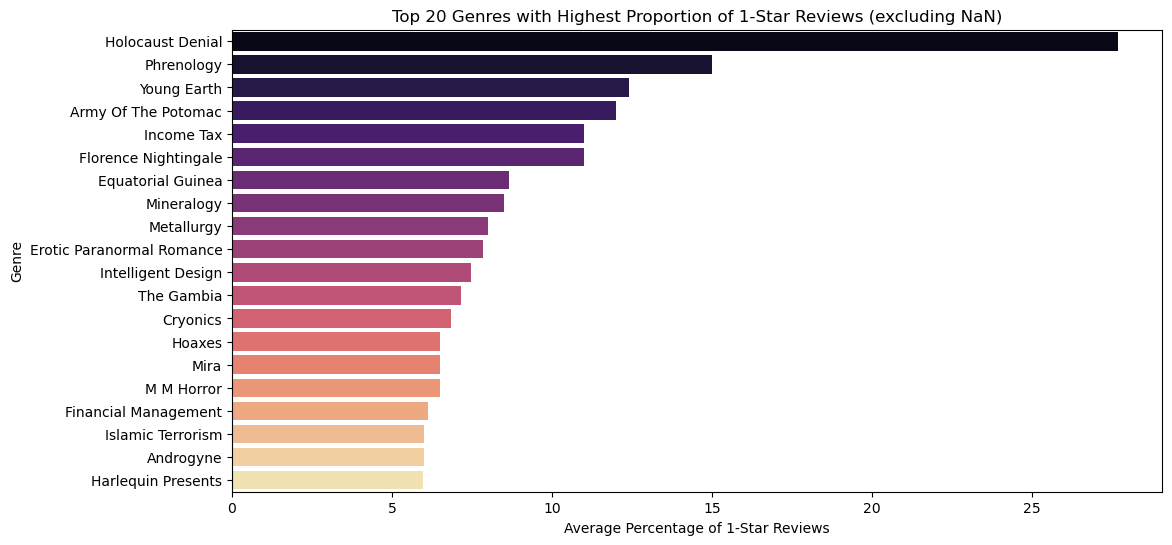

In [ ]:
# Filter out rows where 'genres' is NaN or 'nan'
genre_1star_reviews = filtered_genres.groupby('genres')['1_star_reviews_percentage'].mean() \
                                     .sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_1star_reviews.values, y=genre_1star_reviews.index, palette="magma")
plt.xlabel("Average Percentage of 1-Star Reviews")
plt.ylabel("Genre")
plt.title("Top 20 Genres with Highest Proportion of 1-Star Reviews (excluding NaN)")
plt.show()

### 3. **Relationship Between Number of Ratings and Star Rating**
**Objective**: Understand if books with more ratings tend to have higher or lower average ratings.

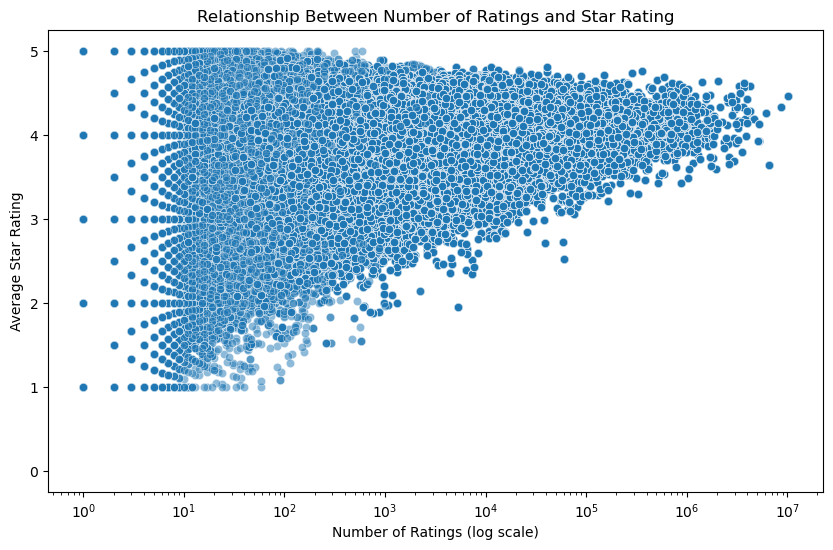

In [ ]:
# Drop rows with NaN in 'star_rating' or 'num_ratings'
ratings_df = df_exploded.dropna(subset=['star_rating', 'num_ratings'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ratings_df['num_ratings'], y=ratings_df['star_rating'], alpha=0.5)
plt.xscale("log")  # Log scale to handle large numbers
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Star Rating")
plt.title("Relationship Between Number of Ratings and Star Rating")
plt.show()

### 4. **Distribution of Star Ratings**
**Objective**: Visualize how ratings are spread across all books.

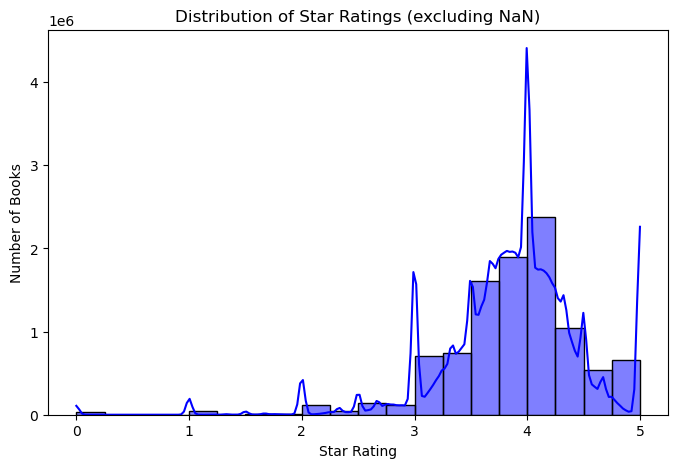

In [ ]:
# Drop NaN values in 'star_rating'
star_rating_series = df_exploded['star_rating'].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(star_rating_series, bins=20, kde=True, color="blue")
plt.xlabel("Star Rating")
plt.ylabel("Number of Books")
plt.title("Distribution of Star Ratings (excluding NaN)")
plt.show()

### 5. **Correlation Matrix**
**Objective**: Identify numerical relationships between rating factors.

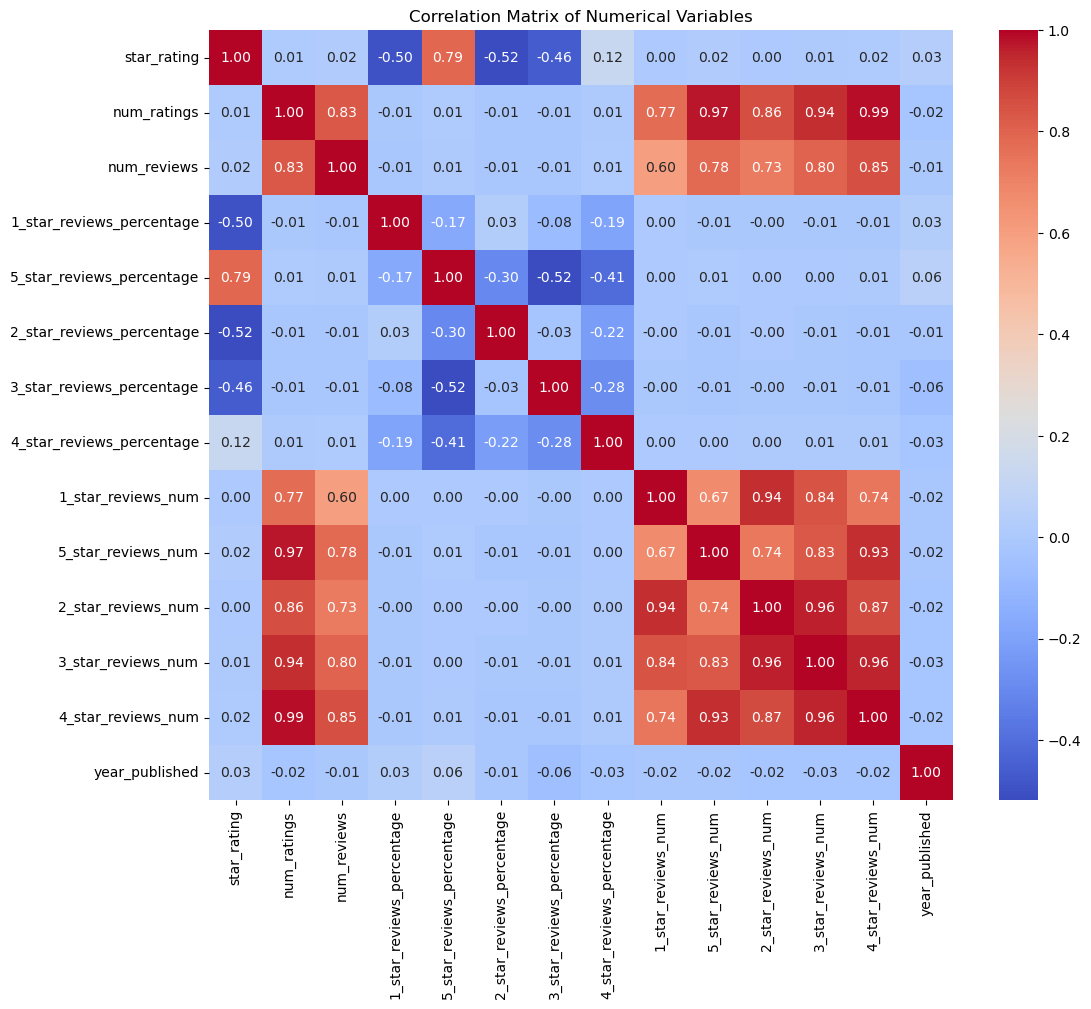

In [ ]:
# Select only the numerical columns
num_cols = ['star_rating', 'num_ratings', 'num_reviews',
            '1_star_reviews_percentage', '5_star_reviews_percentage',
            '2_star_reviews_percentage', '3_star_reviews_percentage',
            '4_star_reviews_percentage', 
            '1_star_reviews_num', '5_star_reviews_num', 
            '2_star_reviews_num', '3_star_reviews_num', '4_star_reviews_num', 
            'year_published']

# Calculate correlation matrix
corr_matrix = df_exploded[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## Adding dataset with text reviews

In [3]:
import pandas as pd
import json
import gzip

chunk_size= 10000
chunks= []

with gzip.open ("./Data/goodreads_reviews_dedup.json.gz", "rt", encoding="utf-8") as f:
    for i, line in enumerate(f): #read line by line
        chunks.append(json.loads(line)) #convert json to stionf dict

    #every chuck line, process data to write csv
        if (i + 1) % chunk_size == 0:
            df_chunk = pd.DataFrame(chunks)
            df_chunk.to_csv("goodreads_reviews", mode="a", index= False, header = (i < chunk_size))
            chunks = []
        
if chunks:
    df_chunk = pd.DataFrame(chunks)
    df_chunk.to_csv("goodreads_reviews", mode ="a", index=False, header=False) 


In [4]:
df_reviews = pd.read_csv("goodreads_reviews")

In [ ]:
df_reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,Fri Aug 25 13:55:02 -0700 2017,Mon Oct 09 08:55:59 -0700 2017,Sat Oct 07 00:00:00 -0700 2017,Sat Aug 26 00:00:00 -0700 2017,16,0
1,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
2,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
3,8842281e1d1347389f2ab93d60773d4d,22078596,fdd13cad0695656be99828cd75d6eb73,4,"Fun, fast paced, and disturbing tale of murder...",Mon Jul 24 02:33:09 -0700 2017,Sun Jul 30 10:23:54 -0700 2017,Sun Jul 30 15:42:05 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,22,4
4,8842281e1d1347389f2ab93d60773d4d,6644782,bd0df91c9d918c0e433b9ab3a9a5c451,4,A fun book that gives you a sense of living in...,Mon Jul 24 02:28:14 -0700 2017,Thu Aug 24 00:07:20 -0700 2017,Sat Aug 05 00:00:00 -0700 2017,Sun Jul 30 00:00:00 -0700 2017,8,0


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15739967 entries, 0 to 15739966
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   book_id       int64 
 2   review_id     object
 3   rating        int64 
 4   review_text   object
 5   date_added    object
 6   date_updated  object
 7   read_at       object
 8   started_at    object
 9   n_votes       int64 
 10  n_comments    int64 
dtypes: int64(4), object(7)
memory usage: 1.3+ GB


In [ ]:
df_reviews['book_id'].duplicated().any()

np.True_

In [5]:
import pandas as pd
import json
import gzip

chunk_size= 10000
chunks= []

with gzip.open ("./Data/goodreads_books.json.gz", "rt", encoding="utf-8") as f:
    for i, line in enumerate(f): #read line by line
        chunks.append(json.loads(line)) #convert json to stionf dict
         
    #every chuck line, process data to write csv
        if (i + 1) % chunk_size == 0:
            df_chunk = pd.DataFrame(chunks)
            df_chunk.to_csv("goodreads_books", mode="a", index= False, header = (i < chunk_size))
            chunks = []
        
if chunks:
    df_chunk = pd.DataFrame(chunks)
    df_chunk.to_csv("goodreads_books", mode ="a", index=False, header=False) 

In [6]:
df_books = pd.read_csv("goodreads_books")

C:\Users\mjack245\AppData\Local\Temp\ipykernel_12880\1036425107.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv("goodreads_books")


In [ ]:
df_books.head(10)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1.0,[],US,NaN,"[{'count': '3', 'name': 'to-read'}, {'count': ...",NaN,False,4.00,NaN,...,9.0,NaN,1984.0,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3.0,5400751.0,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6.0,[],US,NaN,"[{'count': '2634', 'name': 'to-read'}, {'count...",NaN,False,3.23,B000FC0PBC,...,10.0,Abridged,2001.0,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10.0,1323437.0,Good Harbor,Good Harbor
2,NaN,7.0,['189911'],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,False,4.03,NaN,...,NaN,Book Club Edition,1987.0,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140.0,8948723.0,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282.0,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",NaN,False,3.49,B002ENBLOK,...,7.0,NaN,2009.0,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184.0,6243154.0,Best Friends Forever,Best Friends Forever
4,0850308712,5.0,[],US,NaN,"[{'count': '32', 'name': 'to-read'}, {'count':...",NaN,False,3.40,NaN,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15.0,278577.0,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...
5,1599150603,7.0,[],US,NaN,"[{'count': '56', 'name': 'to-read'}, {'count':...",NaN,False,4.13,B00DU10PUG,...,9.0,NaN,2006.0,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46.0,278578.0,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
6,0425040887,4.0,[],US,NaN,"[{'count': '14', 'name': 'to-read'}, {'count':...",NaN,False,4.38,NaN,...,3.0,NaN,1979.0,https://www.goodreads.com/book/show/378460.The...,https://s.gr-assets.com/assets/nophoto/book/11...,378460,12.0,368291.0,The Wanting of Levine,The Wanting of Levine
7,1934876569,6.0,['151854'],US,NaN,"[{'count': '515', 'name': 'to-read'}, {'count'...",NaN,False,4.22,NaN,...,3.0,NaN,2009.0,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98.0,701117.0,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...
8,NaN,4.0,[],US,NaN,"[{'count': '4', 'name': 'to-read'}, {'count': ...",NaN,True,3.86,NaN,...,5.0,NaN,2017.0,https://www.goodreads.com/book/show/34883016-p...,https://images.gr-assets.com/books/1493525974m...,34883016,5.0,56135087.0,Playmaker: A Venom Series Novella,Playmaker: A Venom Series Novella
9,0922915113,39.0,[],US,NaN,"[{'count': '961', 'name': 'to-read'}, {'count'...",NaN,False,3.81,B00AFYVB8Q,...,4.0,NaN,2000.0,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,287149,986.0,278586.0,The Devil's Notebook,The Devil's Notebook


In [ ]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360655 entries, 0 to 2360654
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   isbn                  object 
 1   text_reviews_count    float64
 2   series                object 
 3   country_code          object 
 4   language_code         object 
 5   popular_shelves       object 
 6   asin                  object 
 7   is_ebook              object 
 8   average_rating        float64
 9   kindle_asin           object 
 10  similar_books         object 
 11  description           object 
 12  format                object 
 13  link                  object 
 14  authors               object 
 15  publisher             object 
 16  num_pages             float64
 17  publication_day       float64
 18  isbn13                object 
 19  publication_month     float64
 20  edition_information   object 
 21  publication_year      float64
 22  url                   object 
 23  image_u

In [7]:
print(df_books.columns)

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')


In [19]:
df_merged = df_reviews.merge(df_books, on="book_id", how="inner")

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df_merged.head(10)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
0,8842281e1d1347389f2ab93d60773d4d,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,Fri Aug 25 13:55:02 -0700 2017,Mon Oct 09 08:55:59 -0700 2017,Sat Oct 07 00:00:00 -0700 2017,Sat Aug 26 00:00:00 -0700 2017,16,0,NaN,154.0,['969166'],US,eng,"[{'count': '13910', 'name': 'to-read'}, {'coun...",B00R13OYU6,True,4.38,B00R13OYU6,"['23533039', '23197269', '23492374', '25667918...","This is the second novel in the ""Remembrance o...",NaN,https://www.goodreads.com/book/show/24375664-t...,"[{'author_id': '5780686', 'role': ''}, {'autho...",NaN,513.0,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/24375664-t...,https://s.gr-assets.com/assets/nophoto/book/11...,2925.0,42713958.0,"The Dark Forest (Remembrance of Earth’s Past, #2)","The Dark Forest (Remembrance of Earth’s Past, #2)"
1,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,NaN,374.0,['969165'],US,eng,"[{'count': '3266', 'name': 'to-read'}, {'count...",B00IQO403K,True,4.01,B00IQO403K,"['17934480', '20706284', '23848027', '25499718...",The Three-Body Problemis the first chance for ...,Kindle Edition,https://www.goodreads.com/book/show/18245960-t...,"[{'author_id': '5780686', 'role': ''}, {'autho...",Tor Books,400.0,14.0,NaN,10.0,NaN,2014.0,https://www.goodreads.com/book/show/18245960-t...,https://images.gr-assets.com/books/1396560452m...,6336.0,25696480.0,The Three-Body Problem (Remembrance of Earth’s...,The Three-Body Problem (Remembrance of Earth’s...
2,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0,NaN,42.0,['227079'],US,eng,"[{'count': '1572', 'name': 'mystery'}, {'count...",B000FC2NH6,True,3.80,B000FC2NH6,"['280990', '1332179', '2008927', '383223', '19...","On a French golf course, a millionaire is foun...",NaN,https://www.goodreads.com/book/show/6392944-th...,"[{'author_id': '123715', 'role': ''}]",NaN,272.0,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/6392944-th...,https://images.gr-assets.com/books/1327933709m...,675.0,625995.0,"The Murder on the Links (Hercule Poirot, #2)","The Murder on the Links (Hercule Poirot, #2)"
3,8842281e1d1347389f2ab93d60773d4d,22078596,fdd13cad0695656be99828cd75d6eb73,4,"Fun, fast paced, and disturbing tale of murder...",Mon Jul 24 02:33:09 -0700 2017,Sun Jul 30 10:23:54 -0700 2017,Sun Jul 30 15:42:05 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,22,4,NaN,28.0,[],US,NaN,"[{'count': '111745', 'name': 'to-read'}, {'cou...",B00JTCJE52,True,4.00,B00JTCJE52,"['738448', '10009', '1131999', '317764', '6988...",An acclaimed bestseller and international sens...,NaN,https://www.goodreads.com/book/show/22078596-p...,"[{'author_id': '39402', 'role': ''}, {'author_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/22078596-p...,https://s.gr-assets.com/assets/nophoto/book/11...,429.0,2977727.0,Perfume: The Story of a Murderer,Perfume: The Story of a Murderer
4,8842281e1d1347389f2ab93d60773d4d,6644782,bd0df91c9d918c0e433b9ab3a9a5c451,4,A fun book that gives you a sense of living in...,Mon Jul 24 02:28:14 -0700 2017,Thu Aug 24 00:07:20 -0700 2017,Sat Aug 05 00:00:00 -0700 2017,Sun Jul 30 00:00:00 -0700 2017,8,0,NaN,8.0,[],US,NaN,"[{'count': '16220', 'name': '

In [22]:
print(df_merged.columns)

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments', 'isbn', 'text_reviews_count', 'series', 'country_code',
       'language_code', 'popular_shelves', 'asin', 'is_ebook',
       'average_rating', 'kindle_asin', 'similar_books', 'description',
       'format', 'link', 'authors', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'url', 'image_url', 'ratings_count', 'work_id',
       'title', 'title_without_series'],
      dtype='object')


In [23]:
df_merged=df_merged.drop(columns=['user_id','date_added','read_at','started_at','date_updated','read_at','kindle_asin','work_id','n_comments','asin','similar_books','series','similar_books','publication_month','publication_day','edition_information','is_ebook'])


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15739967 entries, 0 to 15739966
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   book_id               int64  
 1   review_id             object 
 2   rating                int64  
 3   review_text           object 
 4   n_votes               int64  
 5   isbn                  object 
 6   text_reviews_count    float64
 7   country_code          object 
 8   language_code         object 
 9   popular_shelves       object 
 10  average_rating        float64
 11  description           object 
 12  format                object 
 13  link                  object 
 14  authors               object 
 15  publisher             object 
 16  num_pages             float64
 17  isbn13                object 
 18  publication_year      float64
 19  url                   object 
 20  image_url             object 
 21  ratings_count         float64
 22  title                 object 
 23  title

In [26]:
df_merged=df_merged.drop(columns=['format', 'num_pages', 'isbn13', 'link', 'title_without_series'])

In [24]:
df_merged['review_id'].duplicated().any()

np.False_

In [ ]:
(df_merged['text_reviews_count']== 0).any()

np.True_

In [12]:
df_merged[df_merged['text_reviews_count'] == 0]
#?? maybe outdated text review count

,book_id,review_id,rating,review_text,n_votes,isbn,text_reviews_count,country_code,language_code,popular_shelves,...,authors,publisher,num_pages,isbn13,publication_year,url,image_url,ratings_count,title,title_without_series
184446,35297531,7daf00345a65e23b05c2ffc91588ae60,0,"Yes, please!",0,1481462369,0.0,US,NaN,"[{'count': '388', 'name': 'to-read'}, {'count'...",...,"[{'author_id': '6563247', 'role': 'Editor'}, {...",Saga Press,384.0,9781481462365,2018.0,https://www.goodreads.com/book/show/35297531-r...,https://images.gr-assets.com/books/1497085821m...,0.0,Robots vs. Fairies,Robots vs. Fairies
485181,21787180,3cbfdef832cd8161156e249c1260b299,5,I won this ebook along with 2 others from the ...,3,NaN,0.0,US,NaN,"[{'count': '2080', 'name': 'to-read'}, {'count...",...,"[{'author_id': '6604619', 'role': ''}]",Grea Alexander,NaN,9781310406317,2013.0,https://www.goodreads.com/book/show/21787180-r...,https://images.gr-assets.com/books/1401448430m...,0.0,Rebellion Book I: Book of Quay,Rebellion Book I: Book of Quay
548253,21307452,e0741a707420ea23349211c301fe2520,5,Better to Remember? I Think Not. \n This novel...,0,NaN,0.0,US,NaN,"[{'count': '4', 'name': 'to-read'}, {'count': ...",...,"[{'author_id': '166816', 'role': ''}]",NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/21307452-t...,https://s.gr-assets.com/assets/nophoto/book/11...,15.0,The Garden Of Remembrance,The Garden Of Remembrance
734989,30127956,40a2c094aa857a9f03b037fc5805168c,5,"EVERY SCI FI FAN PLEASE READ THIS BOOK, I AM N...",5,NaN,0.0,US,NaN,"[{'count': '713', 'name': 'to-read'}, {'count'...",...,"[{'author_id': '989968', 'role': ''}]",NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/30127956-m...,https://s.gr-assets.com/assets/nophoto/book/11...,6.0,Merchanter's Luck,Merchanter's Luck
1002722,33294208,e131c2c3efc792b94db5285671201ae3,0,I NEED IT.,2,NaN,0.0,US,NaN,"[{'count': '136', 'name': 'to-read'}, {'count'...",...,"[{'author_id': '196561', 'role': ''}]",Simon Pulse,NaN,NaN,2018.0,https://www.goodreads.com/book/show/33294208-l...,https://s.gr-assets.com/assets/nophoto/book/11...,0.0,Letting Go of Gravity,Letting Go of Gravity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15129734,26005439,6c26dc76dd3bb757b419ff10b4967fb3,5,"One morning, David Michaels awakens at his sis...",0,NaN,0.0,US,eng,"[{'count': '1', 'name': 'maybe'}, {'count': '1...",...,"[{'author_id': '7242683', 'role': ''}]",NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/26005439-s...,https://s.gr-assets.com/assets/nophoto/book/11...,6.0,Sh*t Falls Up,Sh*t Falls Up
15230107,22304996,18e0e15314b08f9a8c747890153869da,4,Plot is very good for most of the book. Howeve...,0,NaN,0.0,US,NaN,"[{'count': '17312', 'name': 'to-read'}, {'coun...",...,"[{'author_id': '6252', 'role': ''}]",Tor Fantasy,989.0,NaN,1994.0,https://www.goodreads.com/book/show/22304996-t...,https://images.gr-assets.com/books/1400866546m...,3.0,"The Fires of Heaven (Wheel of Time, #5)","The Fires of Heaven (Wheel of Time, #5)"
15302903,17181407,2866c79e4548931518172d73ccda3653,4,Judith McNaught e uma daquelas autoras que mal...,0,NaN,0.0,US,por,"[{'count': '582', 'name': 'to-read'}, {'count'...",...,"[{'author_id': '9885', 'role': ''}]",Bestbolso,NaN,9788577992461,2012.0,https://www.goodreads.com/book/show/17181407-w...,https://images.gr-assets.com/books/1356459502m...,15.0,"Whitney, Meu Amor (Westmoreland, #2)","Whitney, Meu Amor (Westmoreland, #2)"
15379230,28143537,fef70d8ca75eec469f6fdb64df5e45ed,5,Note: This is a Christian book with faith elem...,2,NaN,0.0,US,eng,"[{'count': '338', 'name': 'to-read'}, {'count'...",...,"[{'author_id': '3934732', 'role': ''}]",eLectio Publishing,364.0,NaN,2015.0,https://www.goodreads.com/book/show/28143537-hugo,https://images.gr-assets.com/books/1450051084m...,1.0,Hugo,Hugo


In [16]:
df_merged[df_merged['rating'] == 0]
#reviews that have text but no star rating was left? I am choosing to leave these out of analysis

,book_id,review_id,rating,review_text,n_votes,isbn,text_reviews_count,popular_shelves,average_rating,description,authors,publisher,publication_year,url,image_url,ratings_count,title
5,1995421,7350a30a2f5c785b190d9ebd1c0b4af9,0,Kevin highly recommended on instagram,4,1578644283,93.0,"[{'count': '8608', 'name': 'to-read'}, {'count...",4.37,Peter Bevelin begins his fascinating book with...,"[{'author_id': '906622', 'role': ''}]",Post Scriptum AB,2007.0,https://www.goodreads.com/book/show/1995421.Se...,https://images.gr-assets.com/books/1330087550m...,1663.0,Seeking Wisdom: From Darwin To Munger
13,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,5,0062300547,13663.0,"[{'count': '3938', 'name': 'to-read'}, {'count...",3.96,From a former Marine and Yale Law School Gradu...,"[{'author_id': '15109469', 'role': ''}]",Harper,2016.0,https://www.goodreads.com/book/show/27161156-h...,https://images.gr-assets.com/books/1463569814m...,99022.0,Hillbilly Elegy: A Memoir of a Family and Cult...
15,32283133,8e4d61801907e591018bdc3442a9cf2b,0,http://www.telegraph.co.uk/culture/10...,9,0385514239,3061.0,"[{'count': '58540', 'name': 'to-read'}, {'coun...",3.86,"Robert Langdon, Harvard professor of symbology...","[{'author_id': '630', 'role': ''}]",Doubleday Books,2017.0,https://www.goodreads.com/book/show/32283133-o...,https://images.gr-assets.com/books/1507308545m...,17494.0,"Origin (Robert Langdon, #5)"
26,4866,6136a87d1b3f2156c19b9d27592eeec3,0,https://brianjohnson.me/philosophers-...,4,0671035975,1025.0,"[{'count': '4768', 'name': 'to-read'}, {'count...",4.08,Learn how to break the worry habit -- Now and ...,"[{'author_id': '3317', 'role': ''}]",Gallery Books,2004.0,https://www.goodreads.com/book/show/4866.How_t...,https://s.gr-assets.com/assets/nophoto/book/11...,48424.0,How to Stop Worrying and Start Living
29,24189224,dbc01e2438df7a87ee3dc16ee23a53e5,0,Numerous people in publishing have told me thi...,11,0385353774,1636.0,"[{'count': '30097', 'name': 'to-read'}, {'coun...",3.41,"New York City, 1976. Meet Regan and William Ha...","[{'author_id': '787031', 'role': ''}]",Knopf,2015.0,https://www.goodreads.com/book/show/24189224-c...,https://images.gr-assets.com/books/1422969880m...,8887.0,City on Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15739780,128029,8486cce302fc7693e27783fe1e870aa9,0,Another great novel depicting the life of wome...,0,1594489505,38212.0,"[{'count': '9380', 'name': 'favorites'}, {'cou...",4.34,At once an incredible chronicle of thirty year...,"[{'author_id': '569', 'role': ''}]",NaN,NaN,https://www.goodreads.com/book/show/128029.A_T...,https://images.gr-assets.com/books/1345958969m...,835172.0,A Thousand Splendid Suns
15739801,6280118,7f950704396c9faa56ee25e8ace775b4,0,The Hollywood-ready latest from Nicholls (The ...,0,0340896965,12806.0,"[{'count': '2397', 'name': 'favorites'}, {'cou...",3.77,It's 1988 and Dexter Mayhew and Emma Morley ha...,"[{'author_id': '46118', 'role': ''}]",NaN,NaN,https://www.goodreads.com/book/show/6280118-on...,https://images.gr-assets.com/books/1327873020m...,225337.0,One Day
15739817,348585,791f291875c5f00ae460b2fef2f6e981,0,fylm sh r dydm kh wyjgy brz an dstn zyby sh bw...,0,NaN,15.0,"[{'count': '100', 'name': 'to-read'}, {'count'...",4.20,NaN,"[{'author_id': '37269', 'role': ''}]",NaN,1999.0,https://www.goodreads.com/book/show/348585._,https://s.gr-assets.com/assets/nophoto/book/11...,271.0,زندگی زيباست
15739844,7121734,317ba5e39f9fc826a8697c1c33f6365d,0,rwy@ jmyl@ wbh lkthyr mn ljr'@ lmw'mwl@ fy lmj...,0,1855167867,498.0,"[{'count': '2616', 'name': 'to-read'}, {'count...",3.18,A bold new voice from Saudi Arabia spins a fas...,"[{'author_id': '4415675', 'role': ''}, {'autho...",dr lsqy,2007.0,https://www.goodreads.com/book/show/7121734,https://images.gr-assets.com/books/1397351040m...,3673.0,بنات الرياض


In [25]:
df_merged= df_merged[df_merged['rating'].notna() & (df_merged['rating'] !=0)]

In [27]:
#for this analysis I will only be focusing on english reviews
#removing nonenglish rows and rows with no text in review_text or description. I dont think this will hurt bc the df is so large
df_merged= df_merged.dropna(subset=['review_text','description'])

In [28]:
df_merged.head()

,book_id,review_id,rating,review_text,n_votes,isbn,text_reviews_count,country_code,language_code,popular_shelves,average_rating,description,authors,publisher,publication_year,url,image_url,ratings_count,title
0,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,16,NaN,154.0,US,eng,"[{'count': '13910', 'name': 'to-read'}, {'coun...",4.38,"This is the second novel in the ""Remembrance o...","[{'author_id': '5780686', 'role': ''}, {'autho...",NaN,NaN,https://www.goodreads.com/book/show/24375664-t...,https://s.gr-assets.com/assets/nophoto/book/11...,2925.0,"The Dark Forest (Remembrance of Earth’s Past, #2)"
1,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,28,NaN,374.0,US,eng,"[{'count': '3266', 'name': 'to-read'}, {'count...",4.01,The Three-Body Problemis the first chance for ...,"[{'author_id': '5780686', 'role': ''}, {'autho...",Tor Books,2014.0,https://www.goodreads.com/book/show/18245960-t...,https://images.gr-assets.com/books/1396560452m...,6336.0,The Three-Body Problem (Remembrance of Earth’s...
2,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,6,NaN,42.0,US,eng,"[{'count': '1572', 'name': 'mystery'}, {'count...",3.80,"On a French golf course, a millionaire is foun...","[{'author_id': '123715', 'role': ''}]",NaN,NaN,https://www.goodreads.com/book/show/6392944-th...,https://images.gr-assets.com/books/1327933709m...,675.0,"The Murder on the Links (Hercule Poirot, #2)"
3,22078596,fdd13cad0695656be99828cd75d6eb73,4,"Fun, fast paced, and disturbing tale of murder...",22,NaN,28.0,US,NaN,"[{'count': '111745', 'name': 'to-read'}, {'cou...",4.00,An acclaimed bestseller and international sens...,"[{'author_id': '39402', 'role': ''}, {'author_...",NaN,NaN,https://www.goodreads.com/book/show/22078596-p...,https://s.gr-assets.com/assets/nophoto/book/11...,429.0,Perfume: The Story of a Murderer
4,6644782,bd0df91c9d918c0e433b9ab3a9a5c451,4,A fun book that gives you a sense of living in...,8,NaN,8.0,US,NaN,"[{'count': '16220', 'name': 'to-read'}, {'coun...",3.76,Paris. The name alone conjures images of chest...,"[{'author_id': '4747', 'role': ''}]",NaN,NaN,https://www.goodreads.com/book/show/6644782-pa...,https://s.gr-assets.com/assets/nophoto/book/11...,98.0,Paris to the Moon


In [29]:
#cleaning popular shelves column
print(df_merged['popular_shelves'].iloc[0])

[{'count': '13910', 'name': 'to-read'}, {'count': '2192', 'name': 'currently-reading'}, {'count': '692', 'name': 'science-fiction'}, {'count': '586', 'name': 'sci-fi'}, {'count': '309', 'name': 'fiction'}, {'count': '184', 'name': 'favorites'}, {'count': '170', 'name': 'scifi'}, {'count': '74', 'name': 'sf'}, {'count': '69', 'name': 'owned'}, {'count': '59', 'name': 'china'}, {'count': '57', 'name': 'kindle'}, {'count': '52', 'name': 'audiobook'}, {'count': '47', 'name': 'ebook'}, {'count': '44', 'name': 'series'}, {'count': '39', 'name': 'library'}, {'count': '39', 'name': 'sci-fi-fantasy'}, {'count': '37', 'name': 'aliens'}, {'count': '33', 'name': 'chinese'}, {'count': '30', 'name': 'audiobooks'}, {'count': '27', 'name': 'read-in-2017'}, {'count': '26', 'name': 'abandoned'}, {'count': '25', 'name': 'translated'}, {'count': '24', 'name': 'audio'}, {'count': '23', 'name': 'to-buy'}, {'count': '22', 'name': 'audible'}, {'count': '21', 'name': 'space-opera'}, {'count': '21', 'name': 'tr

In [35]:
#seeing which shelves have the highest counts
import ast
from collections import Counter

#function that extracts shelf names from string lists of the shelf dictionaires
def shelf_names(shelves_str):
    shelves_list = ast.literal_eval(shelves_str) #convert the string to a list of dicts
    if isinstance(shelves_list, list):
        return [shelf['name'] for shelf in shelves_list if 'name' in shelf] #extract 'name' value from each dict if it exists
    return []

shelf_counter = Counter()

In [36]:
#very large operation (takes about 100 minutes to run)
for row in df_merged['popular_shelves'].dropna():
    shelf_counter.update(shelf_names(row))

print(shelf_counter.most_common(30))

[('to-read', 14293866), ('currently-reading', 13354799), ('favorites', 12011029), ('owned', 11695121), ('fiction', 11464928), ('books-i-own', 10917127), ('kindle', 10834115), ('ebook', 10426857), ('library', 10056423), ('to-buy', 9302580), ('owned-books', 9186195), ('ebooks', 8983839), ('wish-list', 8420976), ('audiobook', 7733129), ('contemporary', 7485768), ('romance', 7404502), ('audiobooks', 7264987), ('adult', 7257338), ('default', 7207756), ('audio', 6979083), ('favourites', 6839962), ('my-books', 6768886), ('series', 6704161), ('read-in-2016', 6464886), ('e-book', 6433005), ('read-in-2015', 6399692), ('i-own', 6281639), ('read-in-2014', 5719777), ('my-library', 5689680), ('read-in-2017', 5588558)]


In [39]:
import random

unique_shelves = list(shelf_counter.keys())
print(f"unique names: {len(unique_shelves)}")

unique names: 1499814


In [40]:
print(shelf_counter.most_common(300))

[('to-read', 14293866), ('currently-reading', 13354799), ('favorites', 12011029), ('owned', 11695121), ('fiction', 11464928), ('books-i-own', 10917127), ('kindle', 10834115), ('ebook', 10426857), ('library', 10056423), ('to-buy', 9302580), ('owned-books', 9186195), ('ebooks', 8983839), ('wish-list', 8420976), ('audiobook', 7733129), ('contemporary', 7485768), ('romance', 7404502), ('audiobooks', 7264987), ('adult', 7257338), ('default', 7207756), ('audio', 6979083), ('favourites', 6839962), ('my-books', 6768886), ('series', 6704161), ('read-in-2016', 6464886), ('e-book', 6433005), ('read-in-2015', 6399692), ('i-own', 6281639), ('read-in-2014', 5719777), ('my-library', 5689680), ('read-in-2017', 5588558), ('fantasy', 5482294), ('dnf', 5399620), ('e-books', 5344933), ('young-adult', 5240364), ('novels', 5102845), ('own-it', 5056702), ('did-not-finish', 5023593), ('maybe', 5022678), ('book-club', 4925631), ('read-in-2013', 4808943), ('books', 4776477), ('adult-fiction', 4668742), ('abando

In [ ]:
#Filtering genres based on research from_____

In [ ]:
#cleaning the author column
print(df_merged['authors'].iloc[0])

In [ ]:
#there is already a language code column but it's not through. Try lang detect to fill in missing
from langdetect import detect
df_merged['dec']

In [ ]:
#checking for final cleaning steps to slim down dataset futher before splitting  then saving to a csv

In [ ]:
#split df into managable chunks for further analysis

In [ ]:
for star in range(0,6):
    df_star = df_merged[df_merged['rating'] == star]
    df_star.to_csv(f"{star}star_reviews.csv")

In [ ]:
#assigning them to variables then checking size

df_5star = pd.read_csv("./Data/5star_reviews.csv")
df_5star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265240 entries, 0 to 5265239
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   book_id               int64  
 2   review_id             object 
 3   rating                int64  
 4   review_text           object 
 5   n_votes               int64  
 6   isbn                  object 
 7   text_reviews_count    float64
 8   series                object 
 9   country_code          object 
 10  language_code         object 
 11  popular_shelves       object 
 12  average_rating        float64
 13  description           object 
 14  format                object 
 15  link                  object 
 16  authors               object 
 17  publisher             object 
 18  num_pages             float64
 19  isbn13                object 
 20  publication_year      float64
 21  url                   object 
 22  image_url             object 
 23  ratings

In [ ]:
df_4star = pd.read_csv("./Data/4star_reviews.csv")
df_4star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250205 entries, 0 to 5250204
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   book_id               int64  
 2   review_id             object 
 3   rating                int64  
 4   review_text           object 
 5   n_votes               int64  
 6   isbn                  object 
 7   text_reviews_count    float64
 8   series                object 
 9   country_code          object 
 10  language_code         object 
 11  popular_shelves       object 
 12  average_rating        float64
 13  description           object 
 14  format                object 
 15  link                  object 
 16  authors               object 
 17  publisher             object 
 18  num_pages             float64
 19  isbn13                object 
 20  publication_year      float64
 21  url                   object 
 22  image_url             object 
 23  ratings

In [ ]:
df_3star = pd.read_csv("./Data/3star_reviews.csv")
df_3star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117525 entries, 0 to 3117524
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   book_id               int64  
 2   review_id             object 
 3   rating                int64  
 4   review_text           object 
 5   n_votes               int64  
 6   isbn                  object 
 7   text_reviews_count    float64
 8   series                object 
 9   country_code          object 
 10  language_code         object 
 11  popular_shelves       object 
 12  average_rating        float64
 13  description           object 
 14  format                object 
 15  link                  object 
 16  authors               object 
 17  publisher             object 
 18  num_pages             float64
 19  isbn13                object 
 20  publication_year      float64
 21  url                   object 
 22  image_url             object 
 23  ratings

In [ ]:
df_2star = pd.read_csv("./Data/2star_reviews.csv")
df_2star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107096 entries, 0 to 1107095
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1107096 non-null  int64  
 1   book_id               1107096 non-null  int64  
 2   review_id             1107096 non-null  object 
 3   rating                1107096 non-null  int64  
 4   review_text           1106815 non-null  object 
 5   n_votes               1107096 non-null  int64  
 6   isbn                  869044 non-null   object 
 7   text_reviews_count    1107063 non-null  float64
 8   series                1107096 non-null  object 
 9   country_code          1107064 non-null  object 
 10  language_code         865653 non-null   object 
 11  popular_shelves       1107096 non-null  object 
 12  average_rating        1107063 non-null  float64
 13  description           1042811 non-null  object 
 14  format                899367 non-n

In [ ]:
df_1star = pd.read_csv("./Data/1star_reviews.csv")
df_1star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448016 entries, 0 to 448015
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            448016 non-null  int64  
 1   book_id               448016 non-null  int64  
 2   review_id             448016 non-null  object 
 3   rating                448016 non-null  int64  
 4   review_text           447726 non-null  object 
 5   n_votes               448016 non-null  int64  
 6   isbn                  344479 non-null  object 
 7   text_reviews_count    448005 non-null  float64
 8   series                448016 non-null  object 
 9   country_code          448005 non-null  object 
 10  language_code         354583 non-null  object 
 11  popular_shelves       448016 non-null  object 
 12  average_rating        448005 non-null  float64
 13  description           420141 non-null  object 
 14  format                359216 non-null  object 
 15  

In [ ]:
df_0star = pd.read_csv("./Data/0star_reviews.csv")
df_0star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551885 entries, 0 to 551884
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            551885 non-null  int64  
 1   book_id               551885 non-null  int64  
 2   review_id             551885 non-null  object 
 3   rating                551885 non-null  int64  
 4   review_text           550454 non-null  object 
 5   n_votes               551885 non-null  int64  
 6   isbn                  426475 non-null  object 
 7   text_reviews_count    551863 non-null  float64
 8   series                551885 non-null  object 
 9   country_code          551863 non-null  object 
 10  language_code         410991 non-null  object 
 11  popular_shelves       551885 non-null  object 
 12  average_rating        551863 non-null  float64
 13  description           517534 non-null  object 
 14  format                445904 non-null  object 
 15  

In [ ]:
# taking a sample of the smallest rating dataset to test for cleaning


In [ ]:
sample_1star= df_1star.sample(10000, random_state=42)

In [ ]:
pd.set_option('display.max_colwidth', None)
sample_1star[['review_text','description']].sample(5, random_state=1)


,review_text,description
285268,dnf...couldn't get into it,NaN
34175,"Terrible book. I don't get why people like it- it makes light of a lot of serious problems such as self harm, eating disorders, and many other mental illnesses. I didn't find it funny and was barely able to finish it. It was just so badly written it took me like 3 months just to finish it. Would never recommend this book to anyone, it's just not a good story anyway...it was really predictable because I already guessed what the ending would be.","""Governor General's Literary Awards nominee for Children's Literature, Text"" Dani Webster had played The Game with her sister, Kelly, for as long as she could remember. It was a secret quest to vanquish evil. The Game is now a hazy memory as Dani looks up from the floor of the isolation room at Riverwood Clinic. God, how did she get here? She remembers the vodka and pills.\nSlowly Dani emerges from the painful effects of substance abuse, and begins to adapt to life at Riverwood, a psychiatric treatment facility for ""teens with problems.""\nAs she recovers from her physical trauma, Dani must confront a deeper emotional trauma, which at the moment she can neither explain nor recognize. There's the cool aloofness of her mother. Her father's abusive perfectionism. Kelly's refusal to answer her letters. Fragmented memories of the last Game. She can't fit all the pieces together.\n""The Game"" is an extraordinary story of betrayal, anger, guilt, confusion and dread, and their brutal effects on the mind. It also a tribute to the healing effects of compassion and friendship, and to the strength we can summon, even in our weakest moments."
47140,"Well this was disappointing. I couldn't even finish it. After constantly forcing myself to pick it back up and get it over with, I eventually just threw in the towel. So much inconsistency with the main character. I couldn't even care about what happened to her next. Blah. She'd been living at her own home (Albeit a bunker her dad made so not really inside her house) for YEARS and has only come across about 3 zombies. Whatever. People come and take what she has without very much of a fight from her. She has had very limited run-ins with zombies yet she's really good at it?? She has way too much skill for someone who hasn't had any experience. The writer chalks that up to her having so many survival books. I quit half way through and she had already had a crush on THREE dudes. Really?? Her response, or lack there of, to the town she finds and the things they do there was just so apathetic that I didn't feel her to be real, therefore I couldn't get into it. Don't waste your time on this one.","Life for Kansas was perfect until the day the world changed.\nShe has been hiding out for four years in solitude. It's the only way to survive. The only way not to draw the living dead. Helping a small group of people, she learns the new world might not be what she assumes. Venturing out of her refuge and comfort zone, she meets Rudy, who helps her find a greater purpose. She realizes that the world has moved on without her. Only it's not what she expects. Her knowledge of the living dead grows and only makes her more curious as humanity continues to hang on by a thread. While on her search for answers she finds comfort in new friendships and love, but her past seems as if it will haunt her forever.\nKansas takes it upon herself to help other survivors, which would be easy if the famished were the only obstacles."
209520,"ktb 'khdh 'kbr mn Hjmh , w hw ktb@ mHDrth lSwty@ , mshbh lktb tTwyr ldht l`rby@ w lshy jdyd.",fnwn lt`ml m` lns fy Zl lsyr@ lnbwy@\nHSyl@ bHwth w dwrt w dhkryt 'kthr mn `shryn sn@\nlmH@ `n lktb : btsm .. btsm .. btsm '`rfh mndh snyn .. fhw 'Hd zmly'y fy `mly .. `l~ kl Hl .. lkn hl tSdq 'nny l~ lan l 'dry hl nbtt lh 'snn 'm l !! dy'm ltjhm .. wl`bws .. wk'nh dh btsm nqS `mrh .. 'w qlWa mlh !! ql jryr bn `bd llh lbjly : m rany rswl llh Sl~ llh `lyh w slm l tbsm fy wjhy .. lbtsm

In [ ]:
import numpy as np
import html
import re

In [ ]:
#attempting to clean the html first
